In [1]:
import os 
from dotenv import load_dotenv, find_dotenv
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In this notebook, I explore the sample fire dispatch data provided to HACK OR Emergency Response Project Team. 
Research questions explored thus far:
*  for incidents (within the incident table), what are the types of incidfoundclass_id labels? How many of each type are there?
*  for incidents, there is another type of categorical label, typenaturecode, which is much more specific. As in 1) above, what are the types of lables and now many of each are there?

In [2]:
# walk root diretory to find and load .env file w/ AWS host, username and password
load_dotenv(find_dotenv())

True

In [3]:
# ucomment to check environment variables
#%env

In [4]:
# connect to postgres

try:
    conn = psycopg2.connect(database=os.environ.get("database"), user=os.environ.get("user"), 
                            password = os.environ.get("password"), 
                            host=os.environ.get("host"), port=os.environ.get("port"))
    print("Opened database successfully")
    
except psycopg2.Error as e:
    print("I am unable to connect to the database")
    print(e)
    print(e.pgcode)
    print(e.pgerror)
    print(traceback.format_exc())

Opened database successfully


In [5]:
def pquery(QUERY):
    '''
    takes SQL query string, opens a cursor, and executes query in psql
    '''
    
    cur = conn.cursor()
    
    try:
        print("SQL QUERY = "+QUERY)
        cur.execute("SET statement_timeout = 0")
        cur.execute(QUERY)
        # Extract the column names and insert them in header
        col_names = []
        for elt in cur.description:
            col_names.append(elt[0])    
    
        D = cur.fetchall() #convert query result to list
        # Create the dataframe, passing in the list of col_names extracted from the description
        return pd.DataFrame(D, columns=col_names)

    except Exception as e:
        print(e.pgerror)
    


In [6]:
QUERY1='''SELECT incident.incident_id, incsitfoundclass.incsitfoundclass_id, incsitfoundclass.description
FROM incident
  INNER JOIN incsitfound
    ON incident.incsitfoundprm_id = incsitfound.incsitfound_id
  LEFT JOIN incsitfoundsub
    ON incsitfound.incsitfoundsub_id = incsitfoundsub.incsitfoundsub_id
  LEFT JOIN incsitfoundclass
    ON incsitfoundsub.incsitfoundclass_id = incsitfoundclass.incsitfoundclass_id;
'''

In [7]:
df1 = pquery(QUERY1)

SQL QUERY = SELECT incident.incident_id, incsitfoundclass.incsitfoundclass_id, incsitfoundclass.description
FROM incident
  INNER JOIN incsitfound
    ON incident.incsitfoundprm_id = incsitfound.incsitfound_id
  LEFT JOIN incsitfoundsub
    ON incsitfound.incsitfoundsub_id = incsitfoundsub.incsitfoundsub_id
  LEFT JOIN incsitfoundclass
    ON incsitfoundsub.incsitfoundclass_id = incsitfoundclass.incsitfoundclass_id;



In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79667 entries, 0 to 79666
Data columns (total 3 columns):
incident_id            79667 non-null int64
incsitfoundclass_id    79667 non-null int64
description            79667 non-null object
dtypes: int64(2), object(1)
memory usage: 1.8+ MB


In [9]:
df1.head(25)

,incident_id,incsitfoundclass_id,description
0,1102989,1,FIRE/EXPLOSION ...
1,1119922,4,HAZARDOUS CONDITIONS ...
2,1125041,6,GOOD INTENT CALLS ...
3,1125042,3,MEDICAL AID / RESCUE CALLS ...
4,1125043,3,MEDICAL AID / RESCUE CALLS ...
5,1125044,5,SERVICE CALL ...
6,1125045,1,FIRE/EXPLOSION ...
7,1125048,3,MEDICAL AID / RESCUE CALLS ...
8,1125049,3,MEDICAL AID / RESCUE CALLS ...
9,1125050,5,SERVICE CALL ...


In [10]:
df1.groupby('description')['description'].count().sort_values(ascending = 0)

description
MEDICAL AID / RESCUE CALLS                            56307
SERVICE CALL                                           8342
FALSE CALLS                                            6003
GOOD INTENT CALLS                                      3942
FIRE/EXPLOSION                                         3071
HAZARDOUS CONDITIONS                                   1594
OTHER SITUATION FOUND                                   249
MUTUAL AID RESPONSE                                      73
OVER PRESSURE RUPTURE, EXPLOSION, OVERHEAT               52
NATURAL CONDITIONS                                       34
Name: description, dtype: int64

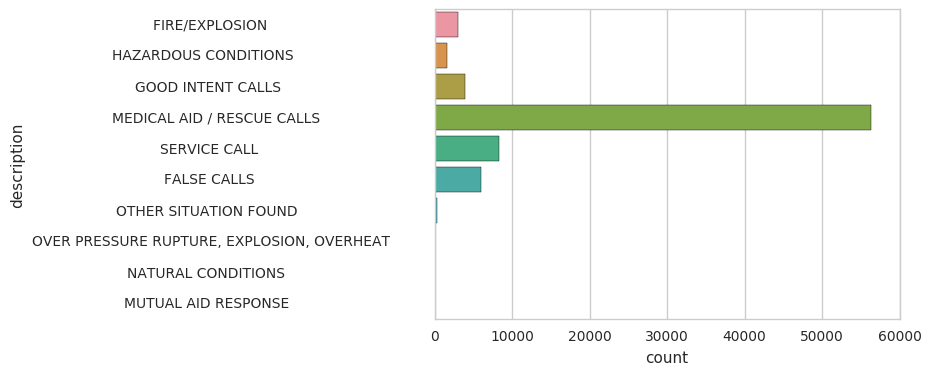

In [11]:
sns.set_style("whitegrid")
sns.countplot(y='description', data = df1)

In [12]:
# incident by desciption as % of total
tab = pd.crosstab(index='count', columns = df1['description']).apply(lambda r: r/r.sum(), axis=1)
tab

description,FALSE CALLS,FIRE/EXPLOSION,GOOD INTENT CALLS,HAZARDOUS CONDITIONS,MEDICAL AID / RESCUE CALLS,MUTUAL AID RESPONSE,NATURAL CONDITIONS,OTHER SITUATION FOUND,"OVER PRESSURE RUPTURE, EXPLOSION, OVERHEAT",SERVICE CALL
row_0,,,,,,,,,,
count,0.075351,0.038548,0.049481,0.020008,0.706779,0.000916,0.000427,0.003126,0.000653,0.104711


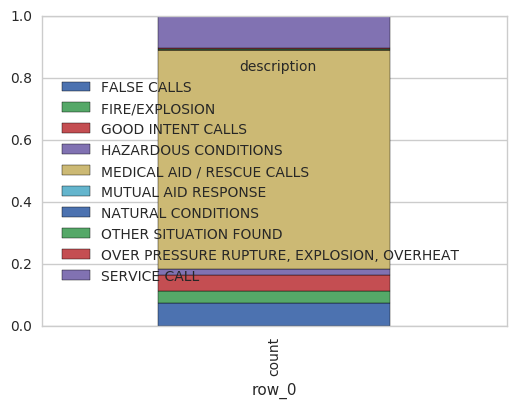

In [13]:
tab.plot.bar(stacked = True)

In [14]:
QUERY2='''
SELECT incident.typenaturecode_id, typenaturecode.description, 
  count(incident.typenaturecode_id) as num
    FROM typenaturecode LEFT JOIN incident
    ON incident.typenaturecode_id = typenaturecode.typenaturecode_id
  GROUP BY incident.typenaturecode_id,typenaturecode.description
  ORDER BY num DESC;
'''

In [15]:
df2 = pquery(QUERY2)

SQL QUERY = 
SELECT incident.typenaturecode_id, typenaturecode.description, 
  count(incident.typenaturecode_id) as num
    FROM typenaturecode LEFT JOIN incident
    ON incident.typenaturecode_id = typenaturecode.typenaturecode_id
  GROUP BY incident.typenaturecode_id,typenaturecode.description
  ORDER BY num DESC;



In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 3 columns):
typenaturecode_id    265 non-null float64
description          477 non-null object
num                  477 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.3+ KB


In [17]:
df2[:50]

,typenaturecode_id,description,num
0,141.0,TRAUMA/1ST RESP ...,8060
1,30.0,BREATHING/1ST RESP ...,7577
2,39.0,CHEST PAIN/1ST RESP ...,7027
3,125.0,SICK/1ST RESP ...,5933
4,12.0,AUTOMATIC FIRE ALARM-COMM ...,4530
5,1.0,ABDOMINAL/1ST RESP ...,3899
6,147.0,UNCONSCIOUS/1ST RESP ...,3567
7,134.0,TRAFFIC ACC/1ST RESP ...,2856
8,110.0,OVERDOSE/1ST RESP ...,2509
9,132.0,SEIZURE/1ST RESP ...,2185


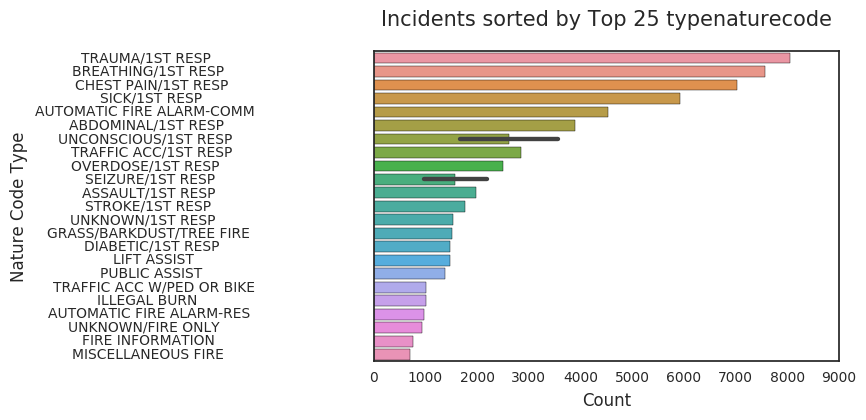

In [18]:
sns.set_style("white") 
brplot =  sns.barplot(x="num", y="description", data=df2[:25])
title = ('Incidents sorted by Top 25 typenaturecode')
# Add title with space below for x-axix ticks and label
brplot.set_title(title, fontsize=15, y=1.06)
brplot.set_ylabel('Nature Code Type', fontsize=12, rotation=90) # rota
brplot.set_xlabel('Count', fontsize=12)
brplot.tick_params(axis='both', labelsize=10)

In [19]:
conn.close()